In [1]:
import matplotlib as mpl
mpl.rcParams["figure.facecolor"] = "white"

mpl.rcParams["axes.facecolor"] = "white"
mpl.rcParams["savefig.facecolor"] = "white"
%matplotlib inline

In [2]:
import pandas as pd
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from calibration_dataset import Tell1Dataset

class MyDS(Tell1Dataset):
    filename_format = '%Y-%m-%d'
    filename_regex_format = r'\d{4}-\d{2}-\d{2}.csv'

datapath = "../data/calibrations/"
data_list = MyDS.get_filepaths_from_dir(datapath)
mds = MyDS(data_list, read=True)




100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:06<00:00,  4.56it/s]


In [5]:
dfh = mds.dfh.df.iloc[:,9:]
dfh_r = mds.dfh['R'].df.iloc[:,9:]
dfh_phi = mds.dfh['phi'].df.iloc[:,9:]

In [12]:
dfp = mds.dfp.df.iloc[:,9:]
dfp_r = mds.dfp['R'].df.iloc[:,9:]
dfp_phi = mds.dfp['phi'].df.iloc[:,9:]
dfp_phi

,channel0,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,channel9,...,channel2038,channel2039,channel2040,channel2041,channel2042,channel2043,channel2044,channel2045,channel2046,channel2047
3780,521.0,518.0,519.0,520.0,517.0,520.0,518.0,518.0,519.0,520.0,...,524.0,526.0,524.0,525.0,526.0,527.0,523.0,528.0,530.0,526.0
3783,520.0,518.0,519.0,520.0,518.0,520.0,518.0,519.0,519.0,520.0,...,524.0,526.0,524.0,525.0,527.0,527.0,524.0,528.0,530.0,527.0
3786,520.0,518.0,519.0,519.0,517.0,519.0,518.0,518.0,519.0,519.0,...,529.0,531.0,529.0,529.0,531.0,532.0,528.0,533.0,535.0,530.0
3789,518.0,516.0,518.0,518.0,516.0,518.0,517.0,518.0,518.0,518.0,...,527.0,529.0,527.0,527.0,529.0,529.0,527.0,530.0,533.0,529.0
3792,519.0,517.0,518.0,519.0,517.0,519.0,518.0,518.0,518.0,519.0,...,528.0,530.0,528.0,528.0,530.0,530.0,527.0,531.0,533.0,529.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7545,517.0,524.0,519.0,522.0,520.0,520.0,521.0,520.0,519.0,522.0,...,505.0,507.0,507.0,509.0,504.0,508.0,508.0,506.0,508.0,504.0
7548,518.0,524.0,518.0,522.0,520.0,519.0,521.0,520.0,519.0,523.0,...,505.0,507.0,507.0,510.0,504.0,509.0,508.0,506.0,509.0,504.0
7551,517.0,524.0,518.0,521.0,520.0,519.0,521.0,520.0,519.0,523.0,...,504.0,506.0,507.0,509.0,503.0,507.0,507.0,505.0,508.0,503.0
7554,517.0,525.0,518.0,522.0,520.0,520.0,521.0,520.0,520.0,522.0,...,505.0,506.0,507.0,509.0,504.0,508.0,507.0,506.0,508.0,503.0


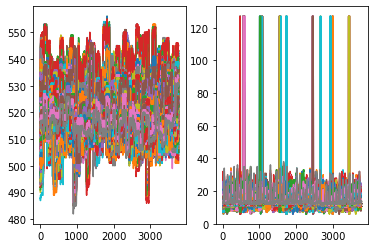

In [28]:
fig, preplot = plt.subplots(1,2)
preplot[0].plot(dfp_r)
preplot[1].plot(dfh_r)
plt.show()

In [43]:
from sklearn.preprocessing import StandardScaler 
#Standarization (-1,1)
dfh_r = 
dfh_phi = StandardScaler().fit_transform(dfh_phi)
dfp_r = StandardScaler().fit_transform(dfp_r)
dfp_phi = StandardScaler().fit_transform(dfp_phi)


{'dfh_r': array([[0.32648299, 0.17350998, 0.16124108, ..., 0.01985777, 0.03358593,
         0.02802011],
        [0.17350998, 0.28748139, 0.16774019, ..., 0.01984722, 0.03331747,
         0.02926388],
        [0.16124108, 0.16774019, 0.65466952, ..., 0.02902884, 0.04878089,
         0.03569622],
        ...,
        [0.01985777, 0.01984722, 0.02902884, ..., 0.17841509, 0.07333564,
         0.07629481],
        [0.03358593, 0.03331747, 0.04878089, ..., 0.07333564, 0.17635014,
         0.09390372],
        [0.02802011, 0.02926388, 0.03569622, ..., 0.07629481, 0.09390372,
         0.17717911]]),
 'dfh_phi': array([[ 0.34922983,  0.25161668,  0.133188  , ..., -0.00701318,
         -0.00818494, -0.01214037],
        [ 0.25161668,  0.33589111,  0.14026133, ..., -0.00631811,
         -0.00920892, -0.01340275],
        [ 0.133188  ,  0.14026133,  0.32398269, ..., -0.02296817,
         -0.01574618, -0.02100174],
        ...,
        [-0.00701318, -0.00631811, -0.02296817, ...,  0.14375165,
    

In [71]:
def test_eigen_vectors(eig_vectors):
    values_to_verify = []
    for eig_vector in eig_vectors:
        value = map(lambda x:x**2,eig_vector)
        values_to_verify.append(float(sum(value)))
    print(values_to_verify)
    np.testing.assert_array_almost_equal(1,values_to_verify)


def full_pca(data, name):
    data_std = StandardScaler().fit_transform(data)
    data_cov_matrix =  np.cov(data_std)
    eig_val, eig_vecs = np.linalg.eig(data_cov_matrix)
    try:
        test_eigen_vectors(eig_vecs)
    except:
        raise Exception("Something went wrong before eigen vector check",)
    
    

In [72]:
    full_pca(dfh_r,"dfh_r")

<ipython-input-71-a34a56ffe96a>:5: ComplexWarning: Casting complex values to real discards the imaginary part
  values_to_verify.append(float(sum(value)))


[0.9998680642580795, 0.9998680642581175, 0.9998680642582706, 0.999868064258032, 0.9998680642581245, 0.9998680642581581, 0.9998680642582088, 0.7707422862289035, 0.9998680642581254, 0.7517066559866011, 0.9998680642581409, 0.9998680642583356, 0.9998680642583666, 0.9998680642583196, 0.9998680642582698, 0.9998680642581247, 0.9998680642583222, 0.9998680642580767, 0.999868064258136, 0.9998680642581074, 0.9998680642581736, 0.9998680642581662, 0.9545720006012345, 0.9323310171555509, 0.9998680642581441, 0.9998680642582898, 0.9998680642579796, 0.9998680642584258, 0.9998680642583087, 0.9998680642581208, 0.9998680642580753, 0.9998680642580137, 0.9998680642583222, 0.9998680642582489, 0.9998680642582297, 0.9998680642581073, 0.9998680642581553, 0.545434369938344, 0.9998680642583196, 0.5393180674635003, 0.9998680642582086, 0.9998680642582156, 0.9998680642581329, 0.9998680642583092, 0.9998680642582538, 0.999868064258081, 0.9998680642582546, 0.9998680642582518, 0.9998680642582909, 0.9998680642581146, 0.9

Exception: Something went wrong before eigen vector check

In [9]:
import neptune
neptune.init()
pca_experiment = neptune.create_experiment(name = "PCA",\
                          tags=["PCA"])



https://ui.neptune.ai/pawel-drabczyk/velodimred/e/VEL-20


In [ ]:
#Środek PCA

In [ ]:
neptune.stop()